<b>imports

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

<b>file reading

In [38]:
file = open("./20230531_CVD_3158_map/20230531_CVD_3158_60s_10x10pts_roi_net_sum.txt", "r")

dat_si_d1 = np.zeros((10, 10))
dat_ga_d1 = np.zeros((10, 10))

dat_si_d2 = np.zeros((10, 10))
dat_ga_d2 = np.zeros((10, 10))

ratio_as_list_d1 = []

for i in range(0, 213):
    s = []
    for j in file.readline().split(" "):
        #purpose of this for block is to get rid of empty strings in the split() output
        if j != "":
            s.append(j)
    if s != []: #check if readline() read anything
        if s[0][0] == "2": #check if it's a line containing data
            x = int(s[0][-3]) #x is the slower changing index
            y = int(s[0][-1]) #y is the most rapidly changing index
            si_counts = int(s[1])
            ga_counts = int(s[6])
            if s[0][-5] == "1": #separate into detector 1 and detector 2
                dat_si_d1[x][y] = si_counts
                dat_ga_d1[x][y] = ga_counts
                ratio_as_list_d1.append(ga_counts/si_counts)
            elif s[0][-5] == "2":
                dat_si_d2[x][y] = si_counts
                dat_ga_d2[x][y] = ga_counts
        
file.close()

<b>statistical processing

In [57]:
vec_si_d1 = dat_si_d1.reshape(100)
vec_si_d2 = dat_si_d2.reshape(100)
vec_ga_d1 = dat_ga_d1.reshape(100)
vec_ga_d2 = dat_ga_d2.reshape(100)

def getStats(ar):
    """calculate and return the follwing statistical properties of ar:
    average
    standard deviation
    average, with 5 highest and lowest points removed
    standard deviation, with 5 highest and lowest points removed

    ar must be a 1d array
    """
    av = np.average(ar)
    std = np.sqrt(np.sum((ar-av)**2)/ar.size)

    trim = np.sort(ar)[5:-5]

    av_trim = np.average(trim)
    std_trim = np.sqrt(np.sum((trim-av_trim)**2)/trim.size)

    return av, std, av_trim, std_trim

avg_si_d1, std_si_d1, t_avg_si_d1, t_std_si_d1 = getStats(vec_si_d1)
avg_si_d2, std_si_d2, t_avg_si_d2, t_std_si_d2 = getStats(vec_si_d2)
avg_ga_d1, std_ga_d1, t_avg_ga_d1, t_std_ga_d1 = getStats(vec_ga_d1)
avg_ga_d2, std_ga_d2, t_avg_ga_d2, t_std_ga_d2 = getStats(vec_ga_d2)

print("\t\t\ttrimmed\ttrimmed")
print("\tAvg\tSTD\tavg\tstd")
print("Si, d1:\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}".format(avg_si_d1, std_si_d1, t_avg_si_d1, t_std_si_d1))
print("Si, d2:\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}".format(avg_si_d2, std_si_d2, t_avg_si_d2, t_std_si_d2))
print("Ga, d1:\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}".format(avg_ga_d1, std_ga_d1, t_avg_ga_d1, t_std_ga_d1))
print("Ga, d2:\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}".format(avg_ga_d2, std_ga_d2, t_avg_ga_d2, t_std_ga_d2))

			trimmed	trimmed
	Avg	STD	avg	std
Si, d1:	339937	1164	339988	814
Si, d2:	354071	1351	354164	962
Ga, d1:	13131	131	13132	102
Ga, d2:	13430	144	13430	117


<b>Generate probability plots

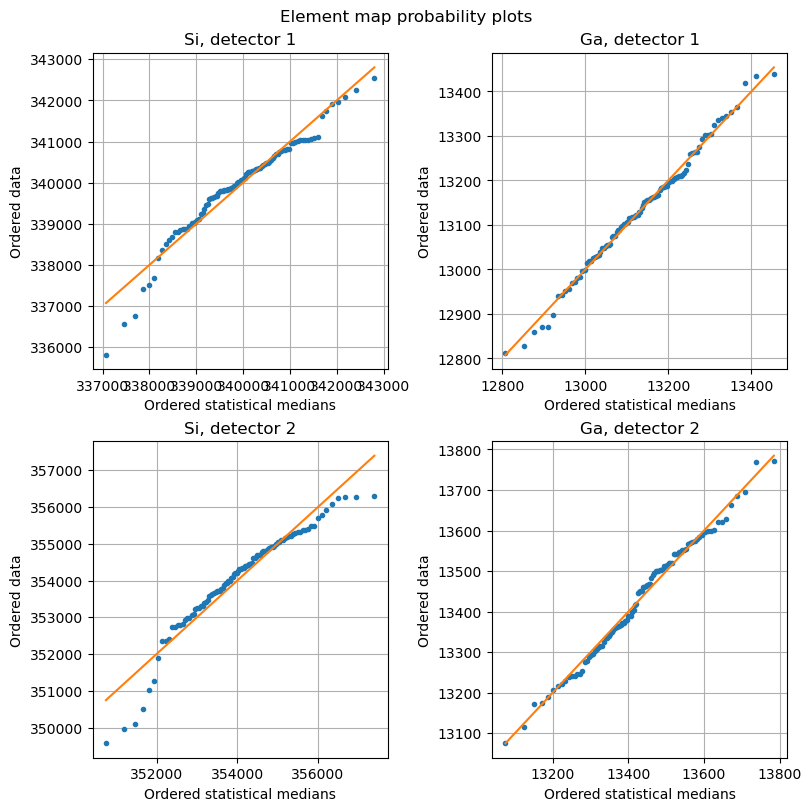

In [64]:
def probPlot(ax, dat, avg, std, title):
    osm, osr = stats.probplot(dat, (avg, std), dist="norm", fit=False)
    ax.plot(osm, osr, ".")
    ax.plot(osm, osm, "-")
    ax.grid(True)
    ax.set_title(title)
    ax.set_xlabel("Ordered statistical medians")
    ax.set_ylabel("Ordered data")

f, ((ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=2, ncols = 2, figsize = (8, 8), layout="constrained")

probPlot(ax7, vec_si_d1, avg_si_d1, std_si_d1, "Si, detector 1")
probPlot(ax9, vec_si_d2, avg_si_d2, std_si_d2, "Si, detector 2")
probPlot(ax8, vec_ga_d1, avg_ga_d1, std_ga_d1, "Ga, detector 1")
probPlot(ax10, vec_ga_d2, avg_ga_d2, std_ga_d2, "Ga, detector 2")

f.suptitle("Element map probability plots")

plt.show()

<b>plot heatmap results

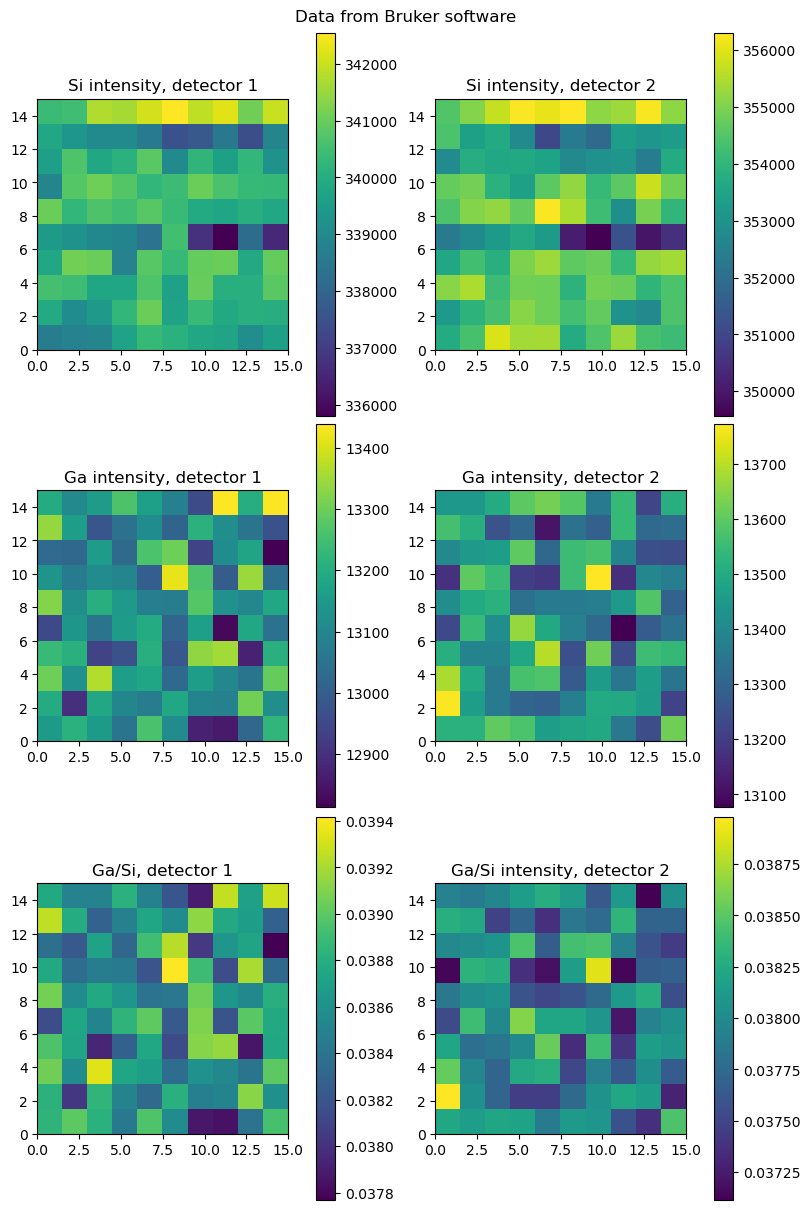

In [63]:
#si_max = max([dat_si_d1.max(), dat_si_d2.max()])
#si_min = min([dat_si_d1.min(), dat_si_d2.min()])

#ga_max = max([dat_ga_d1.max(), dat_ga_d2.max()])
#ga_min = min([dat_ga_d1.min(), dat_ga_d2.min()])

c="viridis"

fg, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(8, 12), layout="constrained")

im1_pointer = ax1.imshow(dat_si_d1, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im1_pointer, ax=ax1)
ax1.set_title("Si intensity, detector 1")

im3_pointer = ax3.imshow(dat_ga_d1, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im3_pointer, ax=ax3)
ax3.set_title("Ga intensity, detector 1")

im5_pointer = ax5.imshow(dat_ga_d1/dat_si_d1, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im5_pointer, ax=ax5)
ax5.set_title("Ga/Si, detector 1")

im2_pointer = ax2.imshow(dat_si_d2, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im2_pointer, ax=ax2)
ax2.set_title("Si intensity, detector 2")

im4_pointer = ax4.imshow(dat_ga_d2, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im4_pointer, ax=ax4)
ax4.set_title("Ga intensity, detector 2")

im6_pointer = ax6.imshow(dat_ga_d2/dat_si_d2, extent = [0, 15, 0, 15], cmap = c)
plt.colorbar(im6_pointer, ax=ax6)
ax6.set_title("Ga/Si intensity, detector 2")

fg.suptitle("Data from Bruker software")

plt.show()